# Edge detection

In [20]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import feature
from scipy import signal

plt.rcParams["figure.figsize"] = (12, 18)

In [21]:
def newrange(image, minval=0, maxval=255):
    """Rescales input image to a new range. Handy for displaying images."""
    return (image - np.min(image))*(maxval - minval)/(np.max(image) - np.min(image))

(-0.5, 1124.5, 749.5, -0.5)

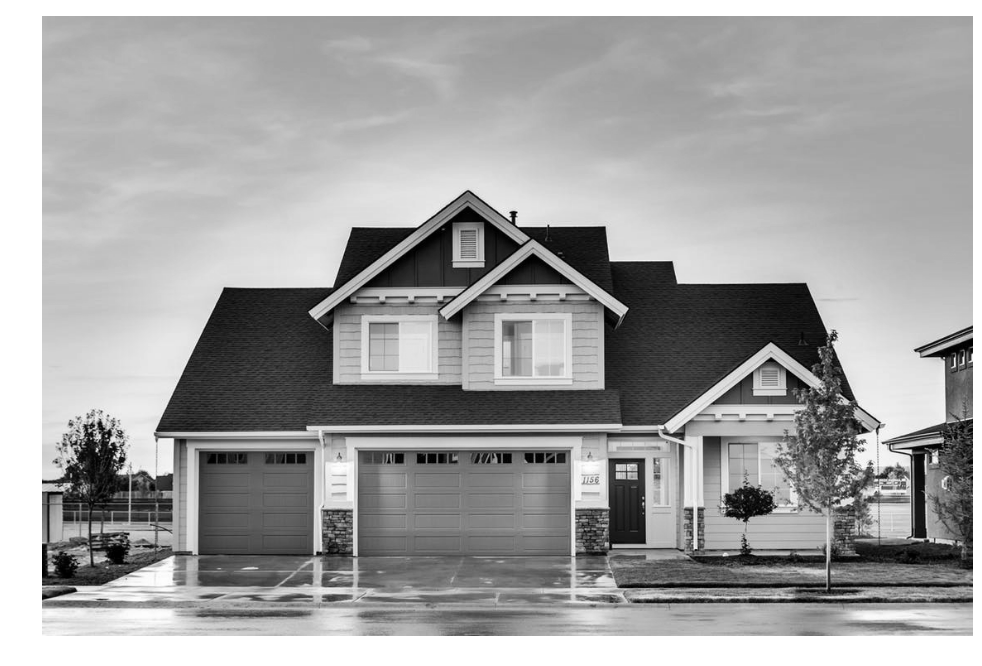

In [22]:
#sign = 'chicago'
#sign = 'head'
#sign = 'houses'
sign = 'house'
#sign = 'sailboat'

im = cv2.imread('assets/images/{}.png'.format(sign), cv2.IMREAD_GRAYSCALE)

write_images = True

plt.imshow(im, cmap='gray')
plt.axis('off')

## Thresholding the 3x3 Sobel gradient magnitude

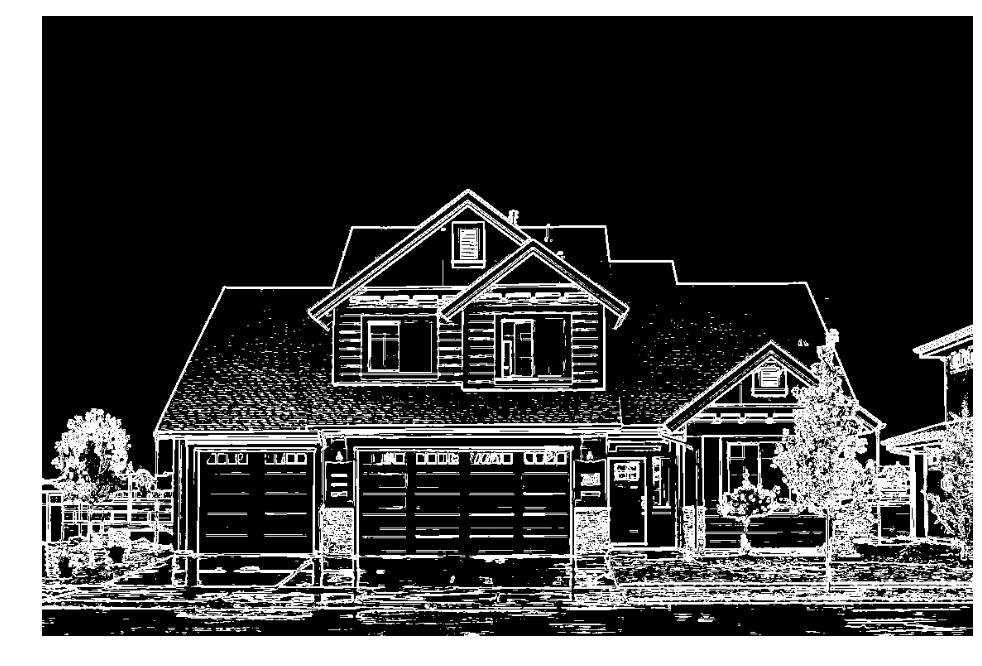

In [23]:
# Threshold (where 1.0 == max(magn))
T = 0.1

h_x = np.array([[ 1,  2,  1],
                [ 0,  0,  0],
                [-1, -2, -1]])
h_y = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

g_x = signal.convolve2d(im, h_x, mode='same', boundary='symm')
g_y = signal.convolve2d(im, h_y, mode='same', boundary='symm')
magn = np.sqrt(g_x**2 + g_y**2)

edges = (magn > T*np.max(magn)).astype('uint8')

plt.imshow(edges, cmap='gray')
plt.axis('off')

if write_images:
    cv2.imwrite('assets/images/' + sign + '_magn_edge.png', newrange(edges))

## Thresholding the 5x5 Laplacian

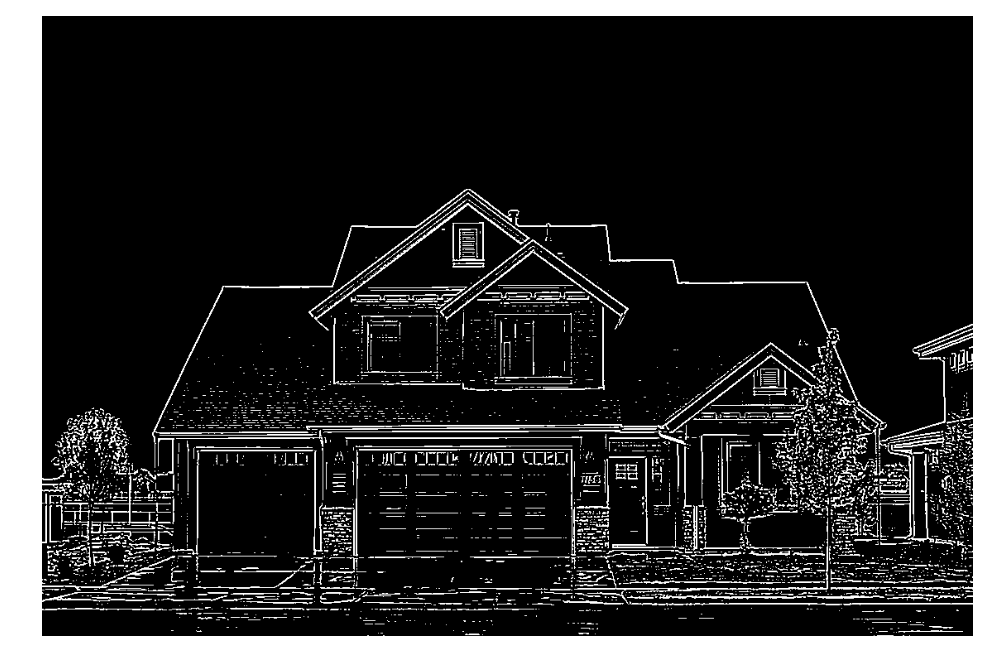

In [24]:
# Threshold (where 1.0 == max(g))
T = 0.1

lap = np.array([[-2, -4, -4, -4, -2],
                [-4,  0,  8, 0, -4],
                [-4,  8, 24, 8, -4],
                [-4,  0,  8, 0, -4],
                [-2, -4, -4, -4, -2]])

g = signal.convolve2d(im, lap, mode='same', boundary='symm')

edges = (g > T*np.max(g)).astype('uint8')

plt.imshow(edges, cmap='gray')
plt.axis('off')

if write_images:
    cv2.imwrite('assets/images/' + sign + '_lap5_edge.png', newrange(edges))

## Thresholding the 7x7 LoG

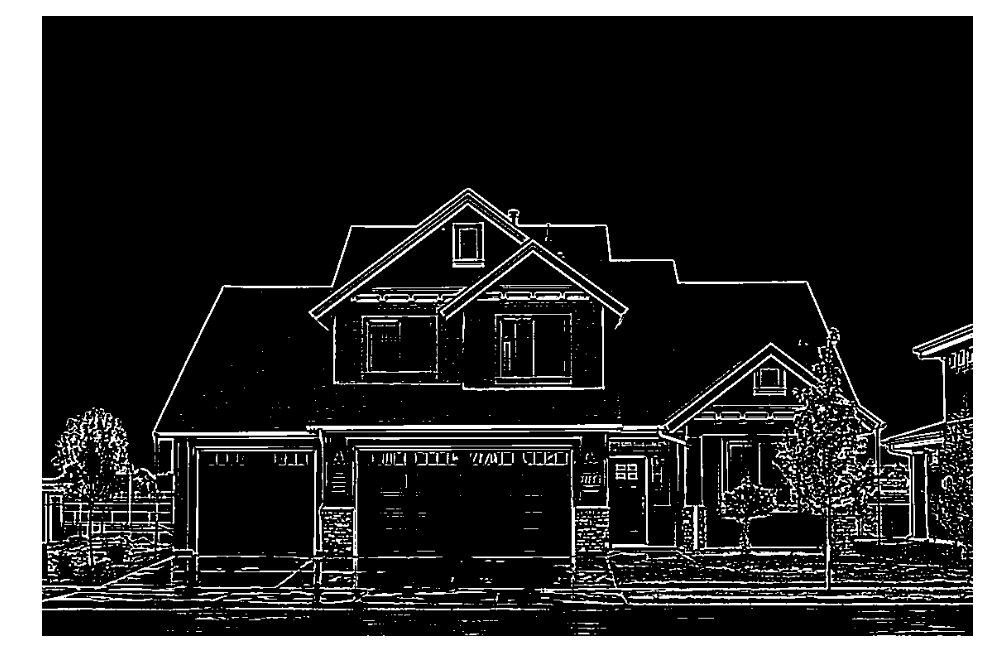

In [25]:
# Threshold (where 1.0 == max(log7))
T = 0.1

G = signal.convolve2d(np.array([[1, 2, 1]]), np.array([[1], [2], [1]]), mode='full')
lap5 = np.array([[-2, -4, -4, -4, -2],
                 [-4,  0,  8,  0, -4],
                 [-4,  8, 24,  8, -4],
                 [-4,  0,  8,  0, -4],
                 [-2, -4, -4, -4, -2]])

log7 = signal.convolve2d(lap5, G, mode='full')

g = signal.convolve2d(im, log7, mode='same', boundary='symm')

edges = (g > T*np.max(g)).astype('uint8')

plt.imshow(g > T*np.max(g), cmap='gray')
plt.axis('off')

if write_images:
    cv2.imwrite('assets/images/' + sign + '_log7_edge.png', newrange(edges))

## Canny's edge detection

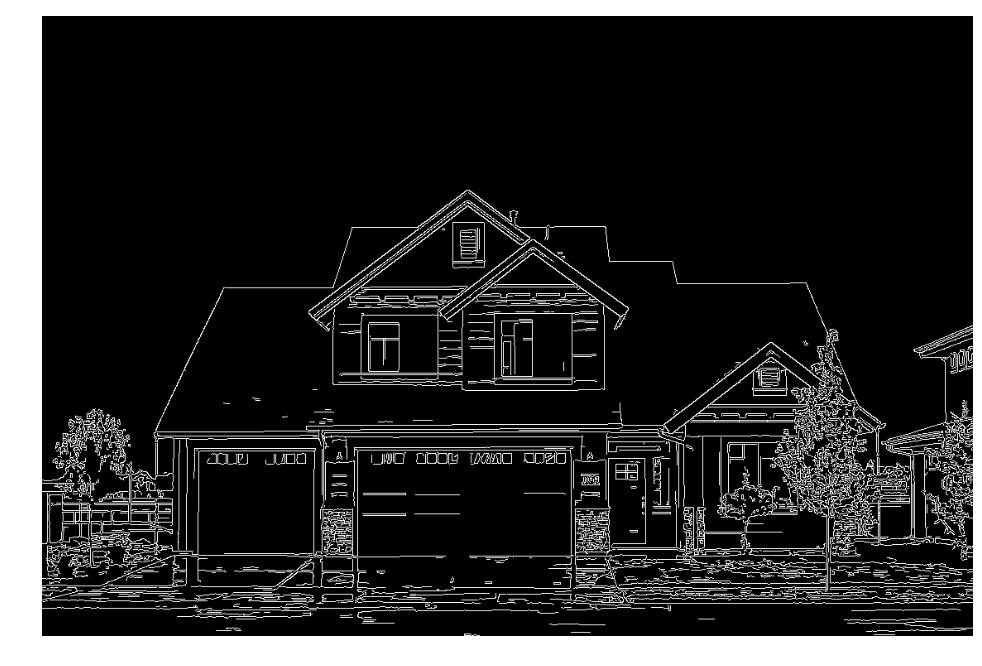

In [26]:
edges = cv2.Canny(im,                # Input image
                  threshold1=100,    # Minimum threshold in the hysteresis procedure
                  threshold2=200,    # Maximum threshold in the hysteresis procedure
                  apertureSize=3,    # Neighbourhood size for the Sobel operator
                  L2gradient=True)   # Whether to use L2 or L1 norm to compute the gradient magnitude

plt.imshow(edges, cmap='gray')
plt.axis('off')

if write_images:
    cv2.imwrite('assets/images/' + sign + '_canny_edge.png', edges)